# Wages/Expenses Over Time
In order to see how housing prices compare with the income to expenses ratio for Minnesota over time, we have to calculate how wages and expenses changed in Minnesota over the same period.

## Analysis
- Expenses had an 18.8% increase since 2011. Wages had an average of a 50.58% increase across the economic development regions since 2011.
- Based on information found, the differences between regions are too close to deem significant.
- We can conclude from this section that based on income to expenses ratio, there isn't enough of a difference to say that living in one area is better than another. Futher analysis of other factors would need to be performed.

In [1]:
# Import Dependencies
import os
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import CSV
csvpath = os.path.join(os.getcwd(), 'mn_weekly_wages_edr2021.csv')
mn_wages = pd.read_csv(csvpath)
mn_wages.columns

Index(['periodyear', 'naicstitle', 'indcode', 'ownership', 'areaname',
       'ownertitle', 'stfips', 'areatype', 'area', 'indlevel', 'pub_order',
       'avgemp1', 'avgemp2', 'avgemp3', 'avgemp4', 'avg_estab1', 'avg_estab2',
       'avg_estab3', 'avg_estab4', 'totwage1', 'totwage2', 'totwage3',
       'totwage4', 'avgwkwage1', 'avgwkwage2', 'avgwkwage3', 'avgwkwage4',
       'empYear', 'avg_estabYear', 'totwageYear', 'avgwkwageYear',
       'gjg_total1', 'gjg_total2', 'gjg_total3', 'gjg_total4', 'gjg_totalYear',
       'gjg_expanding1', 'gjg_expanding2', 'gjg_expanding3', 'gjg_expanding4',
       'gjg_expandingYear', 'gjg_openings1', 'gjg_openings2', 'gjg_openings3',
       'gjg_openings4', 'gjg_openingsYear', 'gjl_total1', 'gjl_total2',
       'gjl_total3', 'gjl_total4', 'gjl_totalYear', 'gjl_contracting1',
       'gjl_contracting2', 'gjl_contracting3', 'gjl_contracting4',
       'gjl_contractingYear', 'gjl_closing1', 'gjl_closing2', 'gjl_closing3',
       'gjl_closing4', 'gjl_closin

In [3]:
# Narrow down to the data we actually need (only using Quarter 4 data, as we are tracking change year over year, not quarter over quarter)
mn_wages_fixed = mn_wages[["naicstitle", "areaname", "ownertitle", "totwage4", "avgwkwage4"]]
mn_wages_fixed.head()

,naicstitle,areaname,ownertitle,totwage4,avgwkwage4
0,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",487916558,1052
1,"Total, All Industries",EDR 1 - Northwest,Total Government,77682380,954
2,"Total, All Industries",EDR 1 - Northwest,Private,410234178,1073
3,"Agriculture, Forestry, Fishing and Hunting",EDR 1 - Northwest,"Total, All Ownerships",18843210,976
4,"Agriculture, Forestry, Fishing and Hunting",EDR 1 - Northwest,Private,18843210,976


In [4]:
# Narrow down to total of all industries
mn_industries = mn_wages_fixed.loc[mn_wages_fixed["naicstitle"] == "Total, All Industries"]
mn_industries.head()

,naicstitle,areaname,ownertitle,totwage4,avgwkwage4
0,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",487916558,1052
1,"Total, All Industries",EDR 1 - Northwest,Total Government,77682380,954
2,"Total, All Industries",EDR 1 - Northwest,Private,410234178,1073
56,"Total, All Industries",EDR 2 - Headwaters,"Total, All Ownerships",384202872,999
57,"Total, All Industries",EDR 2 - Headwaters,Total Government,89881663,1117


In [5]:
# Narrow down to total of all ownerships
mn_owner = mn_industries.loc[mn_industries["ownertitle"] == mn_industries["ownertitle"][0]]
mn_owner

,naicstitle,areaname,ownertitle,totwage4,avgwkwage4
0,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",487916558,1052
56,"Total, All Industries",EDR 2 - Headwaters,"Total, All Ownerships",384202872,999
111,"Total, All Industries",EDR 3 - Arrowhead,"Total, All Ownerships",1919549227,1098
168,"Total, All Industries",EDR 4 - West Central,"Total, All Ownerships",1159892605,1000
225,"Total, All Industries",EDR 5 - North Central,"Total, All Ownerships",749336093,957
281,"Total, All Industries",EDR 6E- Southwest Central,"Total, All Ownerships",689461066,1039
336,"Total, All Industries",EDR 6W- Upper Minnesota Valley,"Total, All Ownerships",198151300,939
390,"Total, All Industries",EDR 7E- East Central,"Total, All Ownerships",567905791,949
446,"Total, All Industries",EDR 7W- Central,"Total, All Ownerships",2523143386,1121
501,"Total, All Industries",EDR 8 - Southwest,"Total, All Ownerships",682577117,987


In [6]:
# Import Cost of Living Data
csvpath2 = os.path.join(os.getcwd(), 'mn_cost_of_living_2021.csv')
mn_col = pd.read_csv(csvpath2)
mn_col.columns

Index(['Area', 'Family Size', 'Number of Adults', 'Number of Workers',
       'Number of Children', 'Age of Adults', 'Yearly Cost', 'Hourly Wage',
       'Child Care', 'Food', 'Health Care', 'Housing', 'Transport', 'Other',
       'Taxes'],
      dtype='object')

In [7]:
# Narrow down to appropriate columns
mn_col = mn_col[["Area", "Family Size", "Yearly Cost", "Hourly Wage", "Child Care", "Food", "Health Care", "Housing", "Transport", "Other", "Taxes"]]
mn_col.head()

,Area,Family Size,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,Aitkin County,1,30874,14.84,0,341,191,570,863,249,359
1,Aitkin County,1,30471,14.65,0,353,152,570,863,253,348
2,Anoka County,1,36938,17.76,0,354,161,1066,680,389,428
3,Anoka County,1,37268,17.92,0,342,199,1066,680,385,434
4,Becker County,1,28659,13.78,0,353,152,592,722,259,310


In [8]:
# The average family size in Minnesota is 3, so we will narrow down to the information for a family size of 3
mn_size = mn_col.loc[mn_col["Family Size"] == 3]
mn_size

,Area,Family Size,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
963,Aitkin County,3,46243,22.23,0,807,538,756,1022,428,303
964,Aitkin County,3,62170,14.94,958,807,538,756,1022,428,672
965,Aitkin County,3,69456,33.39,1438,797,524,1015,929,496,589
966,Aitkin County,3,54604,17.50,479,807,538,756,1022,428,520
967,Anoka County,3,96201,46.25,2074,801,561,1894,727,738,1222
...,...,...,...,...,...,...,...,...,...,...,...
1386,Wright County,3,64327,20.62,501,795,575,1348,859,587,696
1387,Yellow Medicine County,3,49904,12.00,413,834,538,756,781,435,402
1388,Yellow Medicine County,3,46472,14.89,206,834,538,756,781,435,323
1389,Yellow Medicine County,3,55788,26.82,778,825,524,1021,715,505,281


In [9]:
# Find just the rows for each EDR
mn_edr = mn_size[mn_size["Area"].str.contains("EDR")==True]
mn_edr.head()

,Area,Family Size,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
1051,EDR 1 - Northwest,3,55320,26.60,728,806,524,1088,676,519,269
1052,EDR 1 - Northwest,3,49944,12.01,412,816,538,813,736,446,401
1053,EDR 1 - Northwest,3,42552,20.46,0,816,538,813,736,446,197
1054,EDR 1 - Northwest,3,46548,14.92,206,816,538,813,736,446,324
1055,EDR 2 - Headwaters,3,53412,12.84,550,809,538,792,838,438,486


This next section involves finding the averages for each region, as the original data list seprate rows for each combination of family (adults vs children). At the end of the section, the DataFrames will be combined to make a single DataFrame.

In [10]:
EDR_1 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1051]]
EDR_1

,Area,Family Size,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
1051,EDR 1 - Northwest,3,55320,26.60,728,806,524,1088,676,519,269
1052,EDR 1 - Northwest,3,49944,12.01,412,816,538,813,736,446,401
1053,EDR 1 - Northwest,3,42552,20.46,0,816,538,813,736,446,197
1054,EDR 1 - Northwest,3,46548,14.92,206,816,538,813,736,446,324


In [11]:
EDR_1_avg = pd.DataFrame(EDR_1.mean()).T
EDR_1_avg.insert(1, "Area", "EDR 1 - Northwest")
EDR_1_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1025108705.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_1_avg = pd.DataFrame(EDR_1.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 1 - Northwest,48591.0,18.4975,336.5,813.5,534.5,881.75,721.0,464.25,297.75


In [12]:
EDR_2 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1055]]
EDR_2_avg = pd.DataFrame(EDR_2.mean()).T
EDR_2_avg.insert(1, "Area", "EDR 2 - Headwaters")
EDR_2_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3481693980.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_2_avg = pd.DataFrame(EDR_2.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 2 - Headwaters,51054.0,19.385,427.0,806.75,534.5,854.5,820.0,454.75,357.0


In [13]:
EDR_3 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1059]]
EDR_3_avg = pd.DataFrame(EDR_3.mean()).T
EDR_3_avg.insert(1, "Area", "EDR 3 - Arrowhead")
EDR_3_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1214377711.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_3_avg = pd.DataFrame(EDR_3.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 3 - Arrowhead,54321.0,20.6625,572.0,804.75,534.5,940.75,768.75,478.0,428.0


In [14]:
EDR_4 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1063]]
EDR_4_avg = pd.DataFrame(EDR_4.mean()).T
EDR_4_avg.insert(1, "Area", "EDR 4 - West Central")
EDR_4_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3424119839.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_4_avg = pd.DataFrame(EDR_4.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 4 - West Central,50355.0,19.145,411.25,807.75,534.5,872.75,772.5,459.75,337.75


In [15]:
EDR_5 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1067]]
EDR_5_avg = pd.DataFrame(EDR_5.mean()).T
EDR_5_avg.insert(1, "Area", "EDR 5 - North Central")
EDR_5_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/521112118.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_5_avg = pd.DataFrame(EDR_5.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 5 - North Central,51675.0,19.615,433.0,800.75,534.5,838.5,875.5,449.25,374.75


In [16]:
EDR_6E = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1071]]
EDR_6E_avg = pd.DataFrame(EDR_6E.mean()).T
EDR_6E_avg.insert(1, "Area", "EDR 6E- Southwest Central")
EDR_6E_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/4225800944.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_6E_avg = pd.DataFrame(EDR_6E.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 6E- Southwest Central,50739.0,19.305,445.5,807.5,534.5,844.75,795.75,452.0,348.25


In [17]:
EDR_6W = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1075]]
EDR_6W_avg = pd.DataFrame(EDR_6W.mean()).T
EDR_6W_avg.insert(1, "Area", "EDR 6W- Upper Minnesota Valley")
EDR_6W_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2183823125.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_6W_avg = pd.DataFrame(EDR_6W.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 6W- Upper Minnesota Valley,48342.0,18.39,343.75,825.75,534.5,822.5,757.0,451.5,293.5


In [18]:
EDR_7E = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1079]]
EDR_7E_avg = pd.DataFrame(EDR_7E.mean()).T
EDR_7E_avg.insert(1, "Area", "EDR 7E- East Central")
EDR_7E_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/500322218.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_7E_avg = pd.DataFrame(EDR_7E.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 7E- East Central,66591.0,25.3875,729.0,796.75,555.5,1260.0,950.25,563.0,694.75


In [19]:
EDR_7W = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1083]]
EDR_7W_avg = pd.DataFrame(EDR_7W.mean()).T
EDR_7W_avg.insert(1, "Area", "EDR 7W- Central")
EDR_7W_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/201509422.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_7W_avg = pd.DataFrame(EDR_7W.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 7W- Central,63357.0,24.245,713.0,796.75,554.5,1228.5,809.25,554.5,623.25


In [20]:
EDR_8 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1087]]
EDR_8_avg = pd.DataFrame(EDR_8.mean()).T
EDR_8_avg.insert(1, "Area", "EDR 8 - Southwest")
EDR_8_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1087718571.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_8_avg = pd.DataFrame(EDR_8.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 8 - Southwest,47772.0,18.1725,369.75,817.5,534.5,821.25,712.25,448.25,277.5


In [21]:
EDR_9 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1091]]
EDR_9_avg = pd.DataFrame(EDR_9.mean()).T
EDR_9_avg.insert(1, "Area", "EDR 9 - South Central")
EDR_9_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/333781642.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_9_avg = pd.DataFrame(EDR_9.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 9 - South Central,51150.0,19.475,392.75,808.75,534.5,971.5,716.0,487.25,351.75


In [22]:
EDR_10 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1095]]
EDR_10_avg = pd.DataFrame(EDR_10.mean()).T
EDR_10_avg.insert(1, "Area", "EDR 10 - Southeast")
EDR_10_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/18850051.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_10_avg = pd.DataFrame(EDR_10.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 10 - Southeast,55437.0,21.125,582.25,807.75,534.5,983.0,771.5,490.25,450.5


In [23]:
EDR_11 = mn_edr.loc[mn_edr["Area"] == mn_edr["Area"][1099]]
EDR_11_avg = pd.DataFrame(EDR_11.mean()).T
EDR_11_avg.insert(1, "Area", "EDR 11 - 7 County Twin Cities")
EDR_11_avg

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3132173237.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDR_11_avg = pd.DataFrame(EDR_11.mean()).T


,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 11 - 7 County Twin Cities,76563.0,29.27,1216.0,830.75,571.5,1484.5,728.75,633.75,915.0


In [24]:
# Combination DataFrame
frames = [EDR_1_avg, EDR_2_avg, EDR_3_avg, EDR_4_avg, EDR_5_avg, EDR_6E_avg, EDR_6W_avg, EDR_7E_avg, EDR_7W_avg, EDR_8_avg, EDR_9_avg, EDR_10_avg, EDR_11_avg]
mn_edr_avgs = pd.concat(frames, ignore_index=True)
mn_edr_avgs

,Family Size,Area,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,3.0,EDR 1 - Northwest,48591.0,18.4975,336.50,813.50,534.5,881.75,721.00,464.25,297.75
1,3.0,EDR 2 - Headwaters,51054.0,19.3850,427.00,806.75,534.5,854.50,820.00,454.75,357.00
2,3.0,EDR 3 - Arrowhead,54321.0,20.6625,572.00,804.75,534.5,940.75,768.75,478.00,428.00
3,3.0,EDR 4 - West Central,50355.0,19.1450,411.25,807.75,534.5,872.75,772.50,459.75,337.75
4,3.0,EDR 5 - North Central,51675.0,19.6150,433.00,800.75,534.5,838.50,875.50,449.25,374.75
5,3.0,EDR 6E- Southwest Central,50739.0,19.3050,445.50,807.50,534.5,844.75,795.75,452.00,348.25
6,3.0,EDR 6W- Upper Minnesota Valley,48342.0,18.3900,343.75,825.75,534.5,822.50,757.00,451.50,293.50
7,3.0,EDR 7E- East Central,66591.0,25.3875,729.00,796.75,555.5,1260.00,950.25,563.00,694.75
8,3.0,EDR 7W- Central,63357.0,24.2450,713.00,796.75,554.5,1228.50,809.25,554.50,623.25
9,3.0,EDR 8 - Southwest,47772.0,18.1725,369.75,817.50,534.5,821.25,712.25,448.25,277.50


In [25]:
# Grab only columns we need and add a Total Expenses column
mn_edr_avgs_fixed = mn_edr_avgs[["Family Size", "Area", "Hourly Wage", "Food", "Health Care", "Housing", "Transport", "Other"]]
mn_edr_avgs_fixed["Total Expenses"] = ""
mn_edr_avgs_fixed

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1030432889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_edr_avgs_fixed["Total Expenses"] = ""


,Family Size,Area,Hourly Wage,Food,Health Care,Housing,Transport,Other,Total Expenses
0,3.0,EDR 1 - Northwest,18.4975,813.50,534.5,881.75,721.00,464.25,
1,3.0,EDR 2 - Headwaters,19.3850,806.75,534.5,854.50,820.00,454.75,
2,3.0,EDR 3 - Arrowhead,20.6625,804.75,534.5,940.75,768.75,478.00,
3,3.0,EDR 4 - West Central,19.1450,807.75,534.5,872.75,772.50,459.75,
4,3.0,EDR 5 - North Central,19.6150,800.75,534.5,838.50,875.50,449.25,
5,3.0,EDR 6E- Southwest Central,19.3050,807.50,534.5,844.75,795.75,452.00,
6,3.0,EDR 6W- Upper Minnesota Valley,18.3900,825.75,534.5,822.50,757.00,451.50,
7,3.0,EDR 7E- East Central,25.3875,796.75,555.5,1260.00,950.25,563.00,
8,3.0,EDR 7W- Central,24.2450,796.75,554.5,1228.50,809.25,554.50,
9,3.0,EDR 8 - Southwest,18.1725,817.50,534.5,821.25,712.25,448.25,


### Combined DataFrame for EDR Cost of Living

In [26]:
# Find total expenses and add to DataFrame
column_names = ["Food", "Health Care", "Housing", "Transport", "Other"]
mn_edr_avgs_fixed["Total Expenses"] = mn_edr_avgs_fixed[column_names].sum(axis=1)

mn_edr_avgs_fixed

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3856252061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mn_edr_avgs_fixed["Total Expenses"] = mn_edr_avgs_fixed[column_names].sum(axis=1)


,Family Size,Area,Hourly Wage,Food,Health Care,Housing,Transport,Other,Total Expenses
0,3.0,EDR 1 - Northwest,18.4975,813.50,534.5,881.75,721.00,464.25,3415.00
1,3.0,EDR 2 - Headwaters,19.3850,806.75,534.5,854.50,820.00,454.75,3470.50
2,3.0,EDR 3 - Arrowhead,20.6625,804.75,534.5,940.75,768.75,478.00,3526.75
3,3.0,EDR 4 - West Central,19.1450,807.75,534.5,872.75,772.50,459.75,3447.25
4,3.0,EDR 5 - North Central,19.6150,800.75,534.5,838.50,875.50,449.25,3498.50
5,3.0,EDR 6E- Southwest Central,19.3050,807.50,534.5,844.75,795.75,452.00,3434.50
6,3.0,EDR 6W- Upper Minnesota Valley,18.3900,825.75,534.5,822.50,757.00,451.50,3391.25
7,3.0,EDR 7E- East Central,25.3875,796.75,555.5,1260.00,950.25,563.00,4125.50
8,3.0,EDR 7W- Central,24.2450,796.75,554.5,1228.50,809.25,554.50,3943.50
9,3.0,EDR 8 - Southwest,18.1725,817.50,534.5,821.25,712.25,448.25,3333.75


In [27]:
mn_expenses = mn_edr_avgs_fixed[["Area", "Hourly Wage", "Total Expenses"]]
mn_expenses

,Area,Hourly Wage,Total Expenses
0,EDR 1 - Northwest,18.4975,3415.00
1,EDR 2 - Headwaters,19.3850,3470.50
2,EDR 3 - Arrowhead,20.6625,3526.75
3,EDR 4 - West Central,19.1450,3447.25
4,EDR 5 - North Central,19.6150,3498.50
5,EDR 6E- Southwest Central,19.3050,3434.50
6,EDR 6W- Upper Minnesota Valley,18.3900,3391.25
7,EDR 7E- East Central,25.3875,4125.50
8,EDR 7W- Central,24.2450,3943.50
9,EDR 8 - Southwest,18.1725,3333.75


In [28]:
mn_expenses = mn_expenses.astype(str)
mn_expenses.dtypes

Area              object
Hourly Wage       object
Total Expenses    object
dtype: object

In [29]:
# Rename columns from first DataFrame for easier readability
mn_owner_renamed = mn_owner.rename(columns={"naicstitle": "Industry", "areaname": "Area", "ownertitle": "Ownership", "totwage4": "Total Wages", "avgwkwage4": "Avg Weekly Wage"})
mn_owner_renamed

,Industry,Area,Ownership,Total Wages,Avg Weekly Wage
0,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",487916558,1052
56,"Total, All Industries",EDR 2 - Headwaters,"Total, All Ownerships",384202872,999
111,"Total, All Industries",EDR 3 - Arrowhead,"Total, All Ownerships",1919549227,1098
168,"Total, All Industries",EDR 4 - West Central,"Total, All Ownerships",1159892605,1000
225,"Total, All Industries",EDR 5 - North Central,"Total, All Ownerships",749336093,957
281,"Total, All Industries",EDR 6E- Southwest Central,"Total, All Ownerships",689461066,1039
336,"Total, All Industries",EDR 6W- Upper Minnesota Valley,"Total, All Ownerships",198151300,939
390,"Total, All Industries",EDR 7E- East Central,"Total, All Ownerships",567905791,949
446,"Total, All Industries",EDR 7W- Central,"Total, All Ownerships",2523143386,1121
501,"Total, All Industries",EDR 8 - Southwest,"Total, All Ownerships",682577117,987


In [30]:
# Narrow down to needed data
mn_owner_reordered = mn_owner_renamed[["Area", "Industry", "Ownership", "Total Wages", "Avg Weekly Wage"]]
mn_owner_reordered

,Area,Industry,Ownership,Total Wages,Avg Weekly Wage
0,EDR 1 - Northwest,"Total, All Industries","Total, All Ownerships",487916558,1052
56,EDR 2 - Headwaters,"Total, All Industries","Total, All Ownerships",384202872,999
111,EDR 3 - Arrowhead,"Total, All Industries","Total, All Ownerships",1919549227,1098
168,EDR 4 - West Central,"Total, All Industries","Total, All Ownerships",1159892605,1000
225,EDR 5 - North Central,"Total, All Industries","Total, All Ownerships",749336093,957
281,EDR 6E- Southwest Central,"Total, All Industries","Total, All Ownerships",689461066,1039
336,EDR 6W- Upper Minnesota Valley,"Total, All Industries","Total, All Ownerships",198151300,939
390,EDR 7E- East Central,"Total, All Industries","Total, All Ownerships",567905791,949
446,EDR 7W- Central,"Total, All Industries","Total, All Ownerships",2523143386,1121
501,EDR 8 - Southwest,"Total, All Industries","Total, All Ownerships",682577117,987


In [31]:
mn_owner_reordered = mn_owner_reordered.astype(str)
mn_owner_reordered.dtypes

Area               object
Industry           object
Ownership          object
Total Wages        object
Avg Weekly Wage    object
dtype: object

In [32]:
# Make a list of the Total Expenses column
total_expenses_series = mn_edr_avgs_fixed["Total Expenses"].tolist()
total_expenses_series

[3415.0,
 3470.5,
 3526.75,
 3447.25,
 3498.5,
 3434.5,
 3391.25,
 4125.5,
 3943.5,
 3333.75,
 3518.0,
 3587.0,
 4249.25]

In [33]:
# Find quarterly totals
quarterly_totals = [item*4 for item in total_expenses_series]
quarterly_totals

[13660.0,
 13882.0,
 14107.0,
 13789.0,
 13994.0,
 13738.0,
 13565.0,
 16502.0,
 15774.0,
 13335.0,
 14072.0,
 14348.0,
 16997.0]

In [34]:
combined_mn = mn_owner_reordered.copy()
combined_mn

,Area,Industry,Ownership,Total Wages,Avg Weekly Wage
0,EDR 1 - Northwest,"Total, All Industries","Total, All Ownerships",487916558,1052
56,EDR 2 - Headwaters,"Total, All Industries","Total, All Ownerships",384202872,999
111,EDR 3 - Arrowhead,"Total, All Industries","Total, All Ownerships",1919549227,1098
168,EDR 4 - West Central,"Total, All Industries","Total, All Ownerships",1159892605,1000
225,EDR 5 - North Central,"Total, All Industries","Total, All Ownerships",749336093,957
281,EDR 6E- Southwest Central,"Total, All Industries","Total, All Ownerships",689461066,1039
336,EDR 6W- Upper Minnesota Valley,"Total, All Industries","Total, All Ownerships",198151300,939
390,EDR 7E- East Central,"Total, All Industries","Total, All Ownerships",567905791,949
446,EDR 7W- Central,"Total, All Industries","Total, All Ownerships",2523143386,1121
501,EDR 8 - Southwest,"Total, All Industries","Total, All Ownerships",682577117,987


In [35]:
# Add quarterly totals to DataFrame
combined_mn["Total Expenses"] = quarterly_totals
combined_mn

,Area,Industry,Ownership,Total Wages,Avg Weekly Wage,Total Expenses
0,EDR 1 - Northwest,"Total, All Industries","Total, All Ownerships",487916558,1052,13660.0
56,EDR 2 - Headwaters,"Total, All Industries","Total, All Ownerships",384202872,999,13882.0
111,EDR 3 - Arrowhead,"Total, All Industries","Total, All Ownerships",1919549227,1098,14107.0
168,EDR 4 - West Central,"Total, All Industries","Total, All Ownerships",1159892605,1000,13789.0
225,EDR 5 - North Central,"Total, All Industries","Total, All Ownerships",749336093,957,13994.0
281,EDR 6E- Southwest Central,"Total, All Industries","Total, All Ownerships",689461066,1039,13738.0
336,EDR 6W- Upper Minnesota Valley,"Total, All Industries","Total, All Ownerships",198151300,939,13565.0
390,EDR 7E- East Central,"Total, All Industries","Total, All Ownerships",567905791,949,16502.0
446,EDR 7W- Central,"Total, All Industries","Total, All Ownerships",2523143386,1121,15774.0
501,EDR 8 - Southwest,"Total, All Industries","Total, All Ownerships",682577117,987,13335.0


In [36]:
# Narrow down to Total Wages and Total Expenses
combined_mn_narrow = combined_mn[["Area", "Total Wages", "Total Expenses"]]
combined_mn_narrow

,Area,Total Wages,Total Expenses
0,EDR 1 - Northwest,487916558,13660.0
56,EDR 2 - Headwaters,384202872,13882.0
111,EDR 3 - Arrowhead,1919549227,14107.0
168,EDR 4 - West Central,1159892605,13789.0
225,EDR 5 - North Central,749336093,13994.0
281,EDR 6E- Southwest Central,689461066,13738.0
336,EDR 6W- Upper Minnesota Valley,198151300,13565.0
390,EDR 7E- East Central,567905791,16502.0
446,EDR 7W- Central,2523143386,15774.0
501,EDR 8 - Southwest,682577117,13335.0


In [37]:
# Change type of Total Wages to float
combined_mn_narrow["Total Wages"] = combined_mn_narrow["Total Wages"].astype(float)


/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1567252248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_mn_narrow["Total Wages"] = combined_mn_narrow["Total Wages"].astype(float)


In [38]:
# This was the incorrect place to attempt to calculate Cost/Wage Percentage, as I discovered I needed different information. I will leave this, though, so other may learn from my mistake.
combined_mn_narrow["Cost/Wage Percentage"] = (combined_mn_narrow['Total Expenses'] / combined_mn_narrow['Total Wages'].sum()) * 100
combined_mn_narrow_index = combined_mn_narrow.reset_index(drop=True)
combined_mn_narrow_index

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/751489934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_mn_narrow["Cost/Wage Percentage"] = (combined_mn_narrow['Total Expenses'] / combined_mn_narrow['Total Wages'].sum()) * 100


,Area,Total Wages,Total Expenses,Cost/Wage Percentage
0,EDR 1 - Northwest,4.879166e+08,13660.0,0.000028
1,EDR 2 - Headwaters,3.842029e+08,13882.0,0.000029
2,EDR 3 - Arrowhead,1.919549e+09,14107.0,0.000029
3,EDR 4 - West Central,1.159893e+09,13789.0,0.000029
4,EDR 5 - North Central,7.493361e+08,13994.0,0.000029
5,EDR 6E- Southwest Central,6.894611e+08,13738.0,0.000028
6,EDR 6W- Upper Minnesota Valley,1.981513e+08,13565.0,0.000028
7,EDR 7E- East Central,5.679058e+08,16502.0,0.000034
8,EDR 7W- Central,2.523143e+09,15774.0,0.000033
9,EDR 8 - Southwest,6.825771e+08,13335.0,0.000028


### Minnesota Population Data Over Time
In order to correctly calculate cost/wage percentage, I had to divide the total wages by population and multiply by two for the number of working adults per household. However, in order to do that, I had to pull in another dataset that included Minnesota's population over time. From there, I would need to take out 29% (which is the percentage of the population under 18 in Minnesota) in order to find the working population. Then I could continue calculations.

In [39]:
# Import CSV
csvpath3 = os.path.join(os.getcwd(), 'Long-Term-Population-Projections-for-Minnesota-DATA-feb2021_tcm36-469204.csv')
mn_pop_data = pd.read_csv(csvpath3)
mn_pop_data.columns

Index(['region', 'geo_type', 'geo_id', 'sex', 'race', 'year', '999'], dtype='object')

In [40]:
# Narrow down columns
mn_pop = mn_pop_data[["region", "geo_id", "year", "999"]]
mn_pop.head()

,region,geo_id,year,999
0,0,statewide,2010.0,5310843.0
1,0,statewide,2011.0,5345668.0
2,0,statewide,2012.0,5376550.0
3,0,statewide,2013.0,5413693.0
4,0,statewide,2014.0,5451522.0


In [41]:
# Rename columns for easy readability
mn_pop_renamed = mn_pop.rename(columns={"region": "EDR", "geo_id": "Region Type", "year": "Year", "999": "Population"})
mn_pop_renamed.head()

,EDR,Region Type,Year,Population
0,0,statewide,2010.0,5310843.0
1,0,statewide,2011.0,5345668.0
2,0,statewide,2012.0,5376550.0
3,0,statewide,2013.0,5413693.0
4,0,statewide,2014.0,5451522.0


In [42]:
# Find 2021 data
mn_pop_2021 = mn_pop_renamed.loc[mn_pop_renamed["Year"]==2021.0]
mn_pop_2021.head()

,EDR,Region Type,Year,Population
11,0,statewide,2021.0,5724984.0
72,1,all_region,2021.0,84943.0
123,2,all_region,2021.0,86952.0
174,3,all_region,2021.0,324168.0
225,4,all_region,2021.0,234561.0


In [43]:
# Find regions and subregions
mn_pop_regions = mn_pop_2021.loc[(mn_pop_2021["Region Type"] == "all_region") | (mn_pop_2021["Region Type"] == "all_subregion")]
mn_pop_regions

,EDR,Region Type,Year,Population
72,1,all_region,2021.0,84943.0
123,2,all_region,2021.0,86952.0
174,3,all_region,2021.0,324168.0
225,4,all_region,2021.0,234561.0
276,5,all_region,2021.0,165733.0
327,6,all_region,2021.0,156972.0
378,7,all_region,2021.0,608847.0
429,8,all_region,2021.0,115282.0
480,9,all_region,2021.0,233084.0
531,10,all_region,2021.0,513816.0


In [44]:
# Sort regions and reset index
mn_pop_sort = mn_pop_regions.sort_values("EDR")
mn_pop_sort_2 =mn_pop_sort.reset_index(drop=True)
mn_pop_sort_2

,EDR,Region Type,Year,Population
0,1,all_region,2021.0,84943.0
1,10,all_region,2021.0,513816.0
2,11,all_region,2021.0,3200626.0
3,2,all_region,2021.0,86952.0
4,3,all_region,2021.0,324168.0
5,4,all_region,2021.0,234561.0
6,5,all_region,2021.0,165733.0
7,6,all_region,2021.0,156972.0
8,6E,all_subregion,2021.0,115382.0
9,6W,all_subregion,2021.0,41590.0


In [45]:
# Drop the totals for regions 6 and 7, because they are split between east and west
mn_pop_drop = mn_pop_sort_2.drop([7,10])
mn_pop_drop

,EDR,Region Type,Year,Population
0,1,all_region,2021.0,84943.0
1,10,all_region,2021.0,513816.0
2,11,all_region,2021.0,3200626.0
3,2,all_region,2021.0,86952.0
4,3,all_region,2021.0,324168.0
5,4,all_region,2021.0,234561.0
6,5,all_region,2021.0,165733.0
8,6E,all_subregion,2021.0,115382.0
9,6W,all_subregion,2021.0,41590.0
11,7E,all_subregion,2021.0,166964.0


In [46]:
# Reorder rows so they are in EDR number order
mn_pop_fixed_rows = mn_pop_drop.reindex([0,3,4,5,6,8,9,11,12,13,14,1,2])
mn_rows = mn_pop_fixed_rows.reset_index(drop=True)
mn_rows

,EDR,Region Type,Year,Population
0,1,all_region,2021.0,84943.0
1,2,all_region,2021.0,86952.0
2,3,all_region,2021.0,324168.0
3,4,all_region,2021.0,234561.0
4,5,all_region,2021.0,165733.0
5,6E,all_subregion,2021.0,115382.0
6,6W,all_subregion,2021.0,41590.0
7,7E,all_subregion,2021.0,166964.0
8,7W,all_subregion,2021.0,441883.0
9,8,all_region,2021.0,115282.0


In [47]:
# Grab population
edr_pop_data = mn_rows[["EDR", "Population"]]
edr_pop_data

,EDR,Population
0,1,84943.0
1,2,86952.0
2,3,324168.0
3,4,234561.0
4,5,165733.0
5,6E,115382.0
6,6W,41590.0
7,7E,166964.0
8,7W,441883.0
9,8,115282.0


In [48]:
# Rename columns
edr_pop_renamed = edr_pop_data.rename(columns={"EDR": "Area"})
edr_pop_renamed

,Area,Population
0,1,84943.0
1,2,86952.0
2,3,324168.0
3,4,234561.0
4,5,165733.0
5,6E,115382.0
6,6W,41590.0
7,7E,166964.0
8,7W,441883.0
9,8,115282.0


In [49]:
# Replace EDR numbers with the appropriate EDR titles
EDR_title = {"1":"EDR 1 - Northwest", "2":"EDR 2 - Headwaters", "3":"EDR 3 - Arrowhead", "4":"EDR 4 - West Central", "5":"EDR 5 - North Central", "6E":"EDR 6E- Southwest Central", "6W":"EDR 6W- Upper Minnesota Valley",
            "7E":"EDR 7E- East Central", "7W":"EDR 7W- Central", "8":"EDR 8 - Southwest", "9":"EDR 9 - South Central", "10":"EDR 10 - Southeast", "11":"EDR 11 - 7 County Twin Cities"}

edr_pop_fixed = edr_pop_renamed.replace(EDR_title)
edr_pop_fixed

,Area,Population
0,EDR 1 - Northwest,84943.0
1,EDR 2 - Headwaters,86952.0
2,EDR 3 - Arrowhead,324168.0
3,EDR 4 - West Central,234561.0
4,EDR 5 - North Central,165733.0
5,EDR 6E- Southwest Central,115382.0
6,EDR 6W- Upper Minnesota Valley,41590.0
7,EDR 7E- East Central,166964.0
8,EDR 7W- Central,441883.0
9,EDR 8 - Southwest,115282.0


In [50]:
# Add population totals to a list
population_list = edr_pop_fixed["Population"].tolist()

In [51]:
# Add Population data to previous DataFrame
combined_mn_narrow_index["Population"] = population_list
combined_mn_narrow_index

,Area,Total Wages,Total Expenses,Cost/Wage Percentage,Population
0,EDR 1 - Northwest,4.879166e+08,13660.0,0.000028,84943.0
1,EDR 2 - Headwaters,3.842029e+08,13882.0,0.000029,86952.0
2,EDR 3 - Arrowhead,1.919549e+09,14107.0,0.000029,324168.0
3,EDR 4 - West Central,1.159893e+09,13789.0,0.000029,234561.0
4,EDR 5 - North Central,7.493361e+08,13994.0,0.000029,165733.0
5,EDR 6E- Southwest Central,6.894611e+08,13738.0,0.000028,115382.0
6,EDR 6W- Upper Minnesota Valley,1.981513e+08,13565.0,0.000028,41590.0
7,EDR 7E- East Central,5.679058e+08,16502.0,0.000034,166964.0
8,EDR 7W- Central,2.523143e+09,15774.0,0.000033,441883.0
9,EDR 8 - Southwest,6.825771e+08,13335.0,0.000028,115282.0


In [52]:
# Find working population and add it to DataFrame
# Census Bureau states that 29% of population is under 18
combined_mn_narrow_index["Working Population"] = (combined_mn_narrow_index['Population'] - (combined_mn_narrow_index['Population']*0.29))
combined_mn_narrow_index

,Area,Total Wages,Total Expenses,Cost/Wage Percentage,Population,Working Population
0,EDR 1 - Northwest,4.879166e+08,13660.0,0.000028,84943.0,60309.53
1,EDR 2 - Headwaters,3.842029e+08,13882.0,0.000029,86952.0,61735.92
2,EDR 3 - Arrowhead,1.919549e+09,14107.0,0.000029,324168.0,230159.28
3,EDR 4 - West Central,1.159893e+09,13789.0,0.000029,234561.0,166538.31
4,EDR 5 - North Central,7.493361e+08,13994.0,0.000029,165733.0,117670.43
5,EDR 6E- Southwest Central,6.894611e+08,13738.0,0.000028,115382.0,81921.22
6,EDR 6W- Upper Minnesota Valley,1.981513e+08,13565.0,0.000028,41590.0,29528.90
7,EDR 7E- East Central,5.679058e+08,16502.0,0.000034,166964.0,118544.44
8,EDR 7W- Central,2.523143e+09,15774.0,0.000033,441883.0,313736.93
9,EDR 8 - Southwest,6.825771e+08,13335.0,0.000028,115282.0,81850.22


In [53]:
# Find total quarterly wages and add it to DataFrame
combined_mn_narrow_index["Total Quarterly Wages"] = (combined_mn_narrow_index['Total Wages'] / combined_mn_narrow_index['Working Population']) * 2
combined_mn_narrow_index

,Area,Total Wages,Total Expenses,Cost/Wage Percentage,Population,Working Population,Total Quarterly Wages
0,EDR 1 - Northwest,4.879166e+08,13660.0,0.000028,84943.0,60309.53,16180.413212
1,EDR 2 - Headwaters,3.842029e+08,13882.0,0.000029,86952.0,61735.92,12446.655756
2,EDR 3 - Arrowhead,1.919549e+09,14107.0,0.000029,324168.0,230159.28,16680.181021
3,EDR 4 - West Central,1.159893e+09,13789.0,0.000029,234561.0,166538.31,13929.438878
4,EDR 5 - North Central,7.493361e+08,13994.0,0.000029,165733.0,117670.43,12736.183474
5,EDR 6E- Southwest Central,6.894611e+08,13738.0,0.000028,115382.0,81921.22,16832.294880
6,EDR 6W- Upper Minnesota Valley,1.981513e+08,13565.0,0.000028,41590.0,29528.90,13420.838568
7,EDR 7E- East Central,5.679058e+08,16502.0,0.000034,166964.0,118544.44,9581.314670
8,EDR 7W- Central,2.523143e+09,15774.0,0.000033,441883.0,313736.93,16084.452576
9,EDR 8 - Southwest,6.825771e+08,13335.0,0.000028,115282.0,81850.22,16678.687412


In [54]:
# Narrow down to quarterly wages and expenses
narrower_mn = combined_mn_narrow_index[["Area", "Total Quarterly Wages", "Total Expenses"]]
narrower_mn

,Area,Total Quarterly Wages,Total Expenses
0,EDR 1 - Northwest,16180.413212,13660.0
1,EDR 2 - Headwaters,12446.655756,13882.0
2,EDR 3 - Arrowhead,16680.181021,14107.0
3,EDR 4 - West Central,13929.438878,13789.0
4,EDR 5 - North Central,12736.183474,13994.0
5,EDR 6E- Southwest Central,16832.294880,13738.0
6,EDR 6W- Upper Minnesota Valley,13420.838568,13565.0
7,EDR 7E- East Central,9581.314670,16502.0
8,EDR 7W- Central,16084.452576,15774.0
9,EDR 8 - Southwest,16678.687412,13335.0


In [55]:
# Rename to Total Quarterly Expenses for greater accuracy
narrower_renamed = narrower_mn.rename(columns={"Total Expenses": "Total Quarterly Expenses"})
narrower_renamed

,Area,Total Quarterly Wages,Total Quarterly Expenses
0,EDR 1 - Northwest,16180.413212,13660.0
1,EDR 2 - Headwaters,12446.655756,13882.0
2,EDR 3 - Arrowhead,16680.181021,14107.0
3,EDR 4 - West Central,13929.438878,13789.0
4,EDR 5 - North Central,12736.183474,13994.0
5,EDR 6E- Southwest Central,16832.294880,13738.0
6,EDR 6W- Upper Minnesota Valley,13420.838568,13565.0
7,EDR 7E- East Central,9581.314670,16502.0
8,EDR 7W- Central,16084.452576,15774.0
9,EDR 8 - Southwest,16678.687412,13335.0


## Final DataFrame for EDR Quarterly Wages vs Quarterly Expenses (2021)

In [56]:
narrower_renamed["Cost/Wage Percentage"] = (narrower_renamed['Total Quarterly Expenses'] / narrower_renamed['Total Quarterly Wages'])*100
narrower_renamed

,Area,Total Quarterly Wages,Total Quarterly Expenses,Cost/Wage Percentage
0,EDR 1 - Northwest,16180.413212,13660.0,84.423060
1,EDR 2 - Headwaters,12446.655756,13882.0,111.531967
2,EDR 3 - Arrowhead,16680.181021,14107.0,84.573423
3,EDR 4 - West Central,13929.438878,13789.0,98.991784
4,EDR 5 - North Central,12736.183474,13994.0,109.875930
5,EDR 6E- Southwest Central,16832.294880,13738.0,81.616916
6,EDR 6W- Upper Minnesota Valley,13420.838568,13565.0,101.074161
7,EDR 7E- East Central,9581.314670,16502.0,172.231062
8,EDR 7W- Central,16084.452576,15774.0,98.069859
9,EDR 8 - Southwest,16678.687412,13335.0,79.952335


## Going Back in Time

https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/~/link.aspx?_id=6EFC371B917843D59F6E20E99BA40DA4&_z=z

The Federal Reserve Bank of Minneapolis publishes a list of annual average consumer price index values for urban consumers (CPI-U) and the annual percent change (rate of inflation) for every year since 1913 using data collected from the U.S. Bureau of Labor Statistics (BLS). The Minneapolis Fed set 1983 as their base index (1983 = 100 CPI-U), however, since we are only looking data from 2011 to 2021, we will set 2021 as our base index (2011 = 100).

In [57]:
fed_years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
fed_numbers = [100, 104.7, 108.1, 111.8, 112.1, 115.1, 120.2, 126.2, 130.8, 133.9, 146.1]
percent_change = [0, 2.1, 1.5, 1.6, 0.1, 1.3, 2.1, 2.4, 1.8, 1.2, 4.7]

fed_data = pd.DataFrame({"Year": fed_years, "CPI-U":fed_numbers, "CPI-U Percent Change": percent_change})
fed_data

,Year,CPI-U,CPI-U Percent Change
0,2011,100.0,0.0
1,2012,104.7,2.1
2,2013,108.1,1.5
3,2014,111.8,1.6
4,2015,112.1,0.1
5,2016,115.1,1.3
6,2017,120.2,2.1
7,2018,126.2,2.4
8,2019,130.8,1.8
9,2020,133.9,1.2


In [58]:
# Total of 18.8% increase from 2011
fed_date_resort = fed_data.sort_values(by="Year", ascending=False, ignore_index=True)
fed_date_resort

,Year,CPI-U,CPI-U Percent Change
0,2021,146.1,4.7
1,2020,133.9,1.2
2,2019,130.8,1.8
3,2018,126.2,2.4
4,2017,120.2,2.1
5,2016,115.1,1.3
6,2015,112.1,0.1
7,2014,111.8,1.6
8,2013,108.1,1.5
9,2012,104.7,2.1


In [60]:
# Import CSV
csvpath4 = os.path.join(os.getcwd(), 'MN_DEED_Wages_Over_Time.csv')
wages_time = pd.read_csv(csvpath4)
wages_time.head(2)

,periodyear,naicstitle,indcode,ownership,areaname,ownertitle,stfips,areatype,area,indlevel,...,deaths_estabs1,deaths_estabs2,deaths_estabs3,deaths_estabs4,deaths_estabsYear,deaths_employ1,deaths_employ2,deaths_employ3,deaths_employ4,deaths_employYear
0,2021,"Total, All Industries",0,0,EDR 1 - Northwest,"Total, All Ownerships",27,8,R01000,0,...,47,999999,999999,999999,999999,212,999999,999999,999999,999999
1,2020,"Total, All Industries",0,0,EDR 1 - Northwest,"Total, All Ownerships",27,8,R01000,0,...,41,38,35,43,102,87,149,92,130,392


In [61]:
# Narrow down
wages_fixed = wages_time[["periodyear","naicstitle", "areaname", "ownertitle", "totwage4", "avgwkwage4"]]
wages_fixed.head()

,periodyear,naicstitle,areaname,ownertitle,totwage4,avgwkwage4
0,2021,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",487916558,1052
1,2020,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",454805310,997
2,2019,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",421026589,873
3,2018,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",422530838,862
4,2017,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",408554236,836


In [62]:
# Rename columns
wages_renamed = wages_fixed.rename(columns={"periodyear": "Year", "naicstitle": "Industry", "areaname": "Area", "ownertitle": "Ownership", "totwage4": "Total Wages", "avgwkwage4": "Avg Weekly Wage"})
wages_renamed.head()

,Year,Industry,Area,Ownership,Total Wages,Avg Weekly Wage
0,2021,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",487916558,1052
1,2020,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",454805310,997
2,2019,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",421026589,873
3,2018,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",422530838,862
4,2017,"Total, All Industries",EDR 1 - Northwest,"Total, All Ownerships",408554236,836


In [63]:
# Narrow down
wages_narrow = wages_renamed[["Area", "Year", "Total Wages"]]
wages_narrow.head()

,Area,Year,Total Wages
0,EDR 1 - Northwest,2021,487916558
1,EDR 1 - Northwest,2020,454805310
2,EDR 1 - Northwest,2019,421026589
3,EDR 1 - Northwest,2018,422530838
4,EDR 1 - Northwest,2017,408554236


In [64]:
# Add Working Population to a list
working_pop = combined_mn_narrow_index["Working Population"].tolist()

This section creates a separate DataFrame for each year, and then the DataFrames are merged together (which ends up being largely unneccessary, since we end up only needing 2011 and 2021 data).

In [65]:
region_2020 = wages_narrow.loc[wages_narrow["Year"] == 2020]
region_2020["Working Population"] = working_pop
region_2020["Total Quarterly Wages"] = (region_2020['Total Wages'] / region_2020['Working Population']) * 2
region_2020["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2020["Total Quarterly Expenses"] = region_2020["Total Quarterly Expenses (2021)"] - (region_2020["Total Quarterly Expenses (2021)"]*0.047)
region_2020["Cost/Wage Percentage"] = (region_2020['Total Quarterly Expenses'] / region_2020['Total Quarterly Wages'])*100
region_2020


/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1855253966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2020["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1855253966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2020["Total Quarterly Wages"] = (region_2020['Total Wages'] / region_2020['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1855253966.py:4: SettingWithCopyWar

,Area,Year,Total Wages,Working Population,Total Quarterly Wages,Total Quarterly Expenses (2021),Total Quarterly Expenses,Cost/Wage Percentage
1,EDR 1 - Northwest,2020,454805310,60309.53,15082.369569,13660.0,13017.980,86.312565
12,EDR 2 - Headwaters,2020,358973451,61735.92,11629.322152,13882.0,13229.546,113.760250
23,EDR 3 - Arrowhead,2020,1744987482,230159.28,15163.303274,14107.0,13443.971,88.661229
34,EDR 4 - West Central,2020,1082575544,166538.31,13000.919056,13789.0,13140.917,101.076831
45,EDR 5 - North Central,2020,679778236,117670.43,11553.934765,13994.0,13336.282,115.426322
56,EDR 6E- Southwest Central,2020,641149263,81921.22,15652.825068,13738.0,13092.314,83.641860
67,EDR 6W- Upper Minnesota Valley,2020,185020160,29528.90,12531.463075,13565.0,12927.445,103.159902
78,EDR 7E- East Central,2020,523398633,118544.44,8830.420609,16502.0,15726.406,178.093510
89,EDR 7W- Central,2020,2302168476,313736.93,14675.788891,15774.0,15032.622,102.431441
100,EDR 8 - Southwest,2020,645445623,81850.22,15771.383950,13335.0,12708.255,80.577932


In [66]:
region_2019 = wages_narrow.loc[wages_narrow["Year"] == 2019]
region_2019["Working Population"] = working_pop
region_2019["Total Quarterly Wages"] = (region_2019['Total Wages'] / region_2019['Working Population']) * 2
region_2019["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2019["Total Quarterly Expenses"] = region_2019["Total Quarterly Expenses (2021)"] - (region_2019["Total Quarterly Expenses (2021)"]*0.059)
region_2019["Cost/Wage Percentage"] = (region_2019['Total Quarterly Expenses'] / region_2019['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/352231678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2019["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/352231678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2019["Total Quarterly Wages"] = (region_2019['Total Wages'] / region_2019['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/352231678.py:4: SettingWithCopyWarnin

In [67]:
region_2018 = wages_narrow.loc[wages_narrow["Year"] == 2018]
region_2018["Working Population"] = working_pop
region_2018["Total Quarterly Wages"] = (region_2018['Total Wages'] / region_2018['Working Population']) * 2
region_2018["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2018["Total Quarterly Expenses"] = region_2018["Total Quarterly Expenses (2021)"] - (region_2018["Total Quarterly Expenses (2021)"]*0.077)
region_2018["Cost/Wage Percentage"] = (region_2018['Total Quarterly Expenses'] / region_2018['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2731683664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2018["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2731683664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2018["Total Quarterly Wages"] = (region_2018['Total Wages'] / region_2018['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2731683664.py:4: SettingWithCopyWar

In [68]:
region_2017 = wages_narrow.loc[wages_narrow["Year"] == 2017]
region_2017["Working Population"] = working_pop
region_2017["Total Quarterly Wages"] = (region_2017['Total Wages'] / region_2017['Working Population']) * 2
region_2017["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2017["Total Quarterly Expenses"] = region_2017["Total Quarterly Expenses (2021)"] - (region_2017["Total Quarterly Expenses (2021)"]*0.101)
region_2017["Cost/Wage Percentage"] = (region_2017['Total Quarterly Expenses'] / region_2017['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3977042457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2017["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3977042457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2017["Total Quarterly Wages"] = (region_2017['Total Wages'] / region_2017['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/3977042457.py:4: SettingWithCopyWar

In [69]:
region_2016 = wages_narrow.loc[wages_narrow["Year"] == 2016]
region_2016["Working Population"] = working_pop
region_2016["Total Quarterly Wages"] = (region_2016['Total Wages'] / region_2016['Working Population']) * 2
region_2016["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2016["Total Quarterly Expenses"] = region_2016["Total Quarterly Expenses (2021)"] - (region_2016["Total Quarterly Expenses (2021)"]*0.122)
region_2016["Cost/Wage Percentage"] = (region_2016['Total Quarterly Expenses'] / region_2016['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2567254126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2016["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2567254126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2016["Total Quarterly Wages"] = (region_2016['Total Wages'] / region_2016['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2567254126.py:4: SettingWithCopyWar

In [70]:
region_2015 = wages_narrow.loc[wages_narrow["Year"] == 2015]
region_2015["Working Population"] = working_pop
region_2015["Total Quarterly Wages"] = (region_2015['Total Wages'] / region_2015['Working Population']) * 2
region_2015["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2015["Total Quarterly Expenses"] = region_2015["Total Quarterly Expenses (2021)"] - (region_2015["Total Quarterly Expenses (2021)"]*0.135)
region_2015["Cost/Wage Percentage"] = (region_2015['Total Quarterly Expenses'] / region_2015['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/4214839027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2015["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/4214839027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2015["Total Quarterly Wages"] = (region_2015['Total Wages'] / region_2015['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/4214839027.py:4: SettingWithCopyWar

In [71]:
region_2014 = wages_narrow.loc[wages_narrow["Year"] == 2014]
region_2014["Working Population"] = working_pop
region_2014["Total Quarterly Wages"] = (region_2014['Total Wages'] / region_2014['Working Population']) * 2
region_2014["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2014["Total Quarterly Expenses"] = region_2014["Total Quarterly Expenses (2021)"] - (region_2014["Total Quarterly Expenses (2021)"]*0.136)
region_2014["Cost/Wage Percentage"] = (region_2014['Total Quarterly Expenses'] / region_2014['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1343254566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2014["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1343254566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2014["Total Quarterly Wages"] = (region_2014['Total Wages'] / region_2014['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1343254566.py:4: SettingWithCopyWar

In [72]:
region_2013 = wages_narrow.loc[wages_narrow["Year"] == 2013]
region_2013["Working Population"] = working_pop
region_2013["Total Quarterly Wages"] = (region_2013['Total Wages'] / region_2013['Working Population']) * 2
region_2013["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2013["Total Quarterly Expenses"] = region_2013["Total Quarterly Expenses (2021)"] - (region_2013["Total Quarterly Expenses (2021)"]*0.152)
region_2013["Cost/Wage Percentage"] = (region_2013['Total Quarterly Expenses'] / region_2013['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1062151753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2013["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1062151753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2013["Total Quarterly Wages"] = (region_2013['Total Wages'] / region_2013['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/1062151753.py:4: SettingWithCopyWar

In [73]:
region_2012 = wages_narrow.loc[wages_narrow["Year"] == 2012]
region_2012["Working Population"] = working_pop
region_2012["Total Quarterly Wages"] = (region_2012['Total Wages'] / region_2012['Working Population']) * 2
region_2012["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2012["Total Quarterly Expenses"] = region_2012["Total Quarterly Expenses (2021)"] - (region_2012["Total Quarterly Expenses (2021)"]*0.167)
region_2012["Cost/Wage Percentage"] = (region_2012['Total Quarterly Expenses'] / region_2012['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2375051229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2012["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2375051229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2012["Total Quarterly Wages"] = (region_2012['Total Wages'] / region_2012['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2375051229.py:4: SettingWithCopyWar

In [74]:
region_2011 = wages_narrow.loc[wages_narrow["Year"] == 2011]
region_2011["Working Population"] = working_pop
region_2011["Total Quarterly Wages"] = (region_2011['Total Wages'] / region_2011['Working Population']) * 2
region_2011["Total Quarterly Expenses (2021)"] = quarterly_totals
region_2011["Total Quarterly Expenses"] = region_2011["Total Quarterly Expenses (2021)"] - (region_2011["Total Quarterly Expenses (2021)"]*0.188)
region_2011["Cost/Wage Percentage"] = (region_2011['Total Quarterly Expenses'] / region_2011['Total Quarterly Wages'])*100

/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2424434577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2011["Working Population"] = working_pop
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2424434577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2011["Total Quarterly Wages"] = (region_2011['Total Wages'] / region_2011['Working Population']) * 2
/var/folders/ck/fsffbjqs6fq4pw_nl_rsxkyc0000gn/T/ipykernel_44726/2424434577.py:4: SettingWithCopyWar

In [75]:
region_2020_fixed = region_2020[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2019_fixed = region_2019[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2018_fixed = region_2018[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2017_fixed = region_2017[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2016_fixed = region_2016[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2015_fixed = region_2015[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2014_fixed = region_2014[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2013_fixed = region_2013[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2012_fixed = region_2012[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2011_fixed = region_2011[["Area", "Year", "Total Quarterly Wages", "Total Quarterly Expenses", "Cost/Wage Percentage"]]
region_2011_fixed

,Area,Year,Total Quarterly Wages,Total Quarterly Expenses,Cost/Wage Percentage
10,EDR 1 - Northwest,2011,11551.135185,11091.920,96.024502
21,EDR 2 - Headwaters,2011,7780.242199,11272.184,144.882173
32,EDR 3 - Arrowhead,2011,11564.452939,11454.884,99.052537
43,EDR 4 - West Central,2011,8886.136673,11196.668,126.001528
54,EDR 5 - North Central,2011,8051.140002,11363.128,141.136882
65,EDR 6E- Southwest Central,2011,11654.349435,11155.256,95.717535
76,EDR 6W- Upper Minnesota Valley,2011,10803.088161,11014.780,101.959549
87,EDR 7E- East Central,2011,6306.691347,13399.624,212.466780
98,EDR 7W- Central,2011,9509.541832,12808.488,134.690905
109,EDR 8 - Southwest,2011,11291.662014,10828.020,95.893944


In [76]:
# Insert a year column for easier merging
narrower_renamed.insert(1, "Year", 2021)
narrower_renamed["Year"] = 2021
narrower_renamed

,Area,Year,Total Quarterly Wages,Total Quarterly Expenses,Cost/Wage Percentage
0,EDR 1 - Northwest,2021,16180.413212,13660.0,84.423060
1,EDR 2 - Headwaters,2021,12446.655756,13882.0,111.531967
2,EDR 3 - Arrowhead,2021,16680.181021,14107.0,84.573423
3,EDR 4 - West Central,2021,13929.438878,13789.0,98.991784
4,EDR 5 - North Central,2021,12736.183474,13994.0,109.875930
5,EDR 6E- Southwest Central,2021,16832.294880,13738.0,81.616916
6,EDR 6W- Upper Minnesota Valley,2021,13420.838568,13565.0,101.074161
7,EDR 7E- East Central,2021,9581.314670,16502.0,172.231062
8,EDR 7W- Central,2021,16084.452576,15774.0,98.069859
9,EDR 8 - Southwest,2021,16678.687412,13335.0,79.952335


In [77]:
# Test merge a DataFrame this way in case it is needed (it wasn't)
frame_2 = pd.merge(narrower_renamed, region_2020_fixed, on="Area", suffixes=("_2021", "_2020"))
frame_2

,Area,Year_2021,Total Quarterly Wages_2021,Total Quarterly Expenses_2021,Cost/Wage Percentage_2021,Year_2020,Total Quarterly Wages_2020,Total Quarterly Expenses_2020,Cost/Wage Percentage_2020
0,EDR 1 - Northwest,2021,16180.413212,13660.0,84.423060,2020,15082.369569,13017.980,86.312565
1,EDR 2 - Headwaters,2021,12446.655756,13882.0,111.531967,2020,11629.322152,13229.546,113.760250
2,EDR 3 - Arrowhead,2021,16680.181021,14107.0,84.573423,2020,15163.303274,13443.971,88.661229
3,EDR 4 - West Central,2021,13929.438878,13789.0,98.991784,2020,13000.919056,13140.917,101.076831
4,EDR 5 - North Central,2021,12736.183474,13994.0,109.875930,2020,11553.934765,13336.282,115.426322
5,EDR 6E- Southwest Central,2021,16832.294880,13738.0,81.616916,2020,15652.825068,13092.314,83.641860
6,EDR 6W- Upper Minnesota Valley,2021,13420.838568,13565.0,101.074161,2020,12531.463075,12927.445,103.159902
7,EDR 7E- East Central,2021,9581.314670,16502.0,172.231062,2020,8830.420609,15726.406,178.093510
8,EDR 7W- Central,2021,16084.452576,15774.0,98.069859,2020,14675.788891,15032.622,102.431441
9,EDR 8 - Southwest,2021,16678.687412,13335.0,79.952335,2020,15771.383950,12708.255,80.577932


In [78]:
# Total concatenated DataFrame (largely useless)
frames_regions = [narrower_renamed, region_2020_fixed, region_2019_fixed, region_2018_fixed, region_2017_fixed, region_2016_fixed, region_2015_fixed, region_2014_fixed, region_2013_fixed, region_2012_fixed, region_2011_fixed]
final_compare = pd.concat(frames_regions, ignore_index=True)
final_compare

,Area,Year,Total Quarterly Wages,Total Quarterly Expenses,Cost/Wage Percentage
0,EDR 1 - Northwest,2021,16180.413212,13660.000,84.423060
1,EDR 2 - Headwaters,2021,12446.655756,13882.000,111.531967
2,EDR 3 - Arrowhead,2021,16680.181021,14107.000,84.573423
3,EDR 4 - West Central,2021,13929.438878,13789.000,98.991784
4,EDR 5 - North Central,2021,12736.183474,13994.000,109.875930
...,...,...,...,...,...
138,EDR 7W- Central,2011,9509.541832,12808.488,134.690905
139,EDR 8 - Southwest,2011,11291.662014,10828.020,95.893944
140,EDR 9 - South Central,2011,10887.368514,11426.464,104.951568
141,EDR 10 - Southeast,2011,13884.821793,11650.576,83.908718


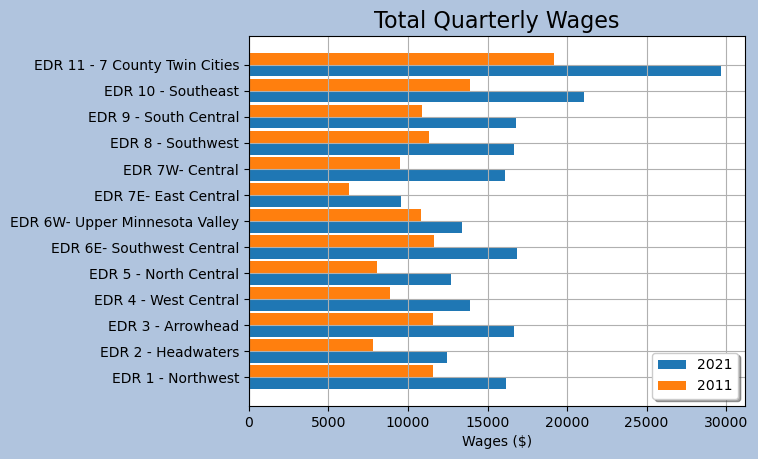

In [79]:
# Plot information from 2011 and 2021 to show differences in quarterly wages
fig, ax = plt.subplots()

x = np.arange(len(narrower_renamed["Area"]))
width=0.45
EDR_title = ["EDR 1 - Northwest", "EDR 2 - Headwaters", "EDR 3 - Arrowhead", "EDR 4 - West Central", "EDR 5 - North Central", "EDR 6E- Southwest Central", "EDR 6W- Upper Minnesota Valley",
            "EDR 7E- East Central", "EDR 7W- Central", "EDR 8 - Southwest", "EDR 9 - South Central", "EDR 10 - Southeast", "EDR 11 - 7 County Twin Cities"]

x_axis_2020 = narrower_renamed["Area"]
y_axis_2020 = narrower_renamed["Total Quarterly Wages"]
y_axis_2011 = region_2011_fixed["Total Quarterly Wages"]

bar_2020 = ax.barh(x-width/2, y_axis_2020, width, label="2021")
bar_2011 = ax.barh(x+width/2, y_axis_2011, width, label="2011")

plt.legend(loc="lower right", shadow=True)
fig.patch.set_facecolor("lightsteelblue")
ax.set_yticks(x)
ax.set_yticklabels(EDR_title)

plt.grid()
plt.title("Total Quarterly Wages", fontsize=16)
plt.xlabel("Wages ($)")

plt.savefig("total_quarterly_wages.png")
plt.show()

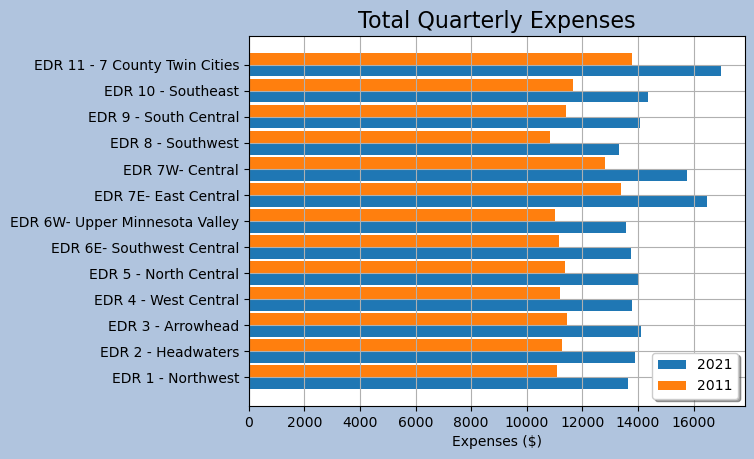

In [81]:
# Plot differences in quarterly expenses
fig, ax = plt.subplots()

x2 = np.arange(len(narrower_renamed["Area"]))
width=0.45
EDR_title = ["EDR 1 - Northwest", "EDR 2 - Headwaters", "EDR 3 - Arrowhead", "EDR 4 - West Central", "EDR 5 - North Central", "EDR 6E- Southwest Central", "EDR 6W- Upper Minnesota Valley",
            "EDR 7E- East Central", "EDR 7W- Central", "EDR 8 - Southwest", "EDR 9 - South Central", "EDR 10 - Southeast", "EDR 11 - 7 County Twin Cities"]

x_axis_2020_2 = narrower_renamed["Area"]
y_axis_2020_2 = narrower_renamed["Total Quarterly Expenses"]
y_axis_2011_2 = region_2011_fixed["Total Quarterly Expenses"]

bar_2020_2 = ax.barh(x-width/2, y_axis_2020_2, width, label="2021")
bar_2011_2 = ax.barh(x+width/2, y_axis_2011_2, width, label="2011")

plt.legend(loc="lower right", shadow=True)

fig.patch.set_facecolor("lightsteelblue")
ax.set_yticks(x)
ax.set_yticklabels(EDR_title)

plt.grid()
plt.title("Total Quarterly Expenses", fontsize=16)
plt.xlabel("Expenses ($)")

plt.savefig("total_quarterly_expenses.png")
plt.show()

In [82]:
# Correct merge for 2011 and 2021 data
merge_2011_2021 = pd.merge(narrower_renamed, region_2011_fixed, on="Area", suffixes=("_2021", "_2011"))
merge_2011_2021["Wages Percent Change"] = ((merge_2011_2021["Total Quarterly Wages_2021"] - merge_2011_2021["Total Quarterly Wages_2011"])/(merge_2011_2021["Total Quarterly Wages_2011"])*100)
merge_2011_2021

,Area,Year_2021,Total Quarterly Wages_2021,Total Quarterly Expenses_2021,Cost/Wage Percentage_2021,Year_2011,Total Quarterly Wages_2011,Total Quarterly Expenses_2011,Cost/Wage Percentage_2011,Wages Percent Change
0,EDR 1 - Northwest,2021,16180.413212,13660.0,84.423060,2011,11551.135185,11091.920,96.024502,40.076390
1,EDR 2 - Headwaters,2021,12446.655756,13882.0,111.531967,2011,7780.242199,11272.184,144.882173,59.977742
2,EDR 3 - Arrowhead,2021,16680.181021,14107.0,84.573423,2011,11564.452939,11454.884,99.052537,44.236663
3,EDR 4 - West Central,2021,13929.438878,13789.0,98.991784,2011,8886.136673,11196.668,126.001528,56.754722
4,EDR 5 - North Central,2021,12736.183474,13994.0,109.875930,2011,8051.140002,11363.128,141.136882,58.191057
5,EDR 6E- Southwest Central,2021,16832.294880,13738.0,81.616916,2011,11654.349435,11155.256,95.717535,44.429296
6,EDR 6W- Upper Minnesota Valley,2021,13420.838568,13565.0,101.074161,2011,10803.088161,11014.780,101.959549,24.231501
7,EDR 7E- East Central,2021,9581.314670,16502.0,172.231062,2011,6306.691347,13399.624,212.466780,51.923000
8,EDR 7W- Central,2021,16084.452576,15774.0,98.069859,2011,9509.541832,12808.488,134.690905,69.140142
9,EDR 8 - Southwest,2021,16678.687412,13335.0,79.952335,2011,11291.662014,10828.020,95.893944,47.707994


In [83]:
# Finding average of wage change percentage
avg_percentage_change = merge_2011_2021["Wages Percent Change"].mean()
avg_percentage_change

50.575265658468275